<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Aula 11 - Forecasting - Previsões Para Séries Temporais - Modelo Base</font></b></strong>

<b>Por que Forecasting é Importante?</b>


A previsão de séries temporais (chamado Forecasting) é uma área importante do aprendizado de máquina que geralmente é negligenciada.

É importante porque existem muitos problemas de previsão que envolvem um componente de tempo. Esses problemas são negligenciados porque é esse componente do tempo que dificulta o manuseio dos dados de séries temporais.


<b>O Tempo</b>


O tempo desempenha um papel básico, e muitas vezes irrelevante, nos conjuntos de dados que usamos em Machine Learning de forma tradicional (qualquer coisa que não seja série temporal).

São feitas previsões para novos dados quando o resultado real pode não ser conhecido até alguma data futura. O futuro está sendo previsto, mas todas as observações anteriores são quase sempre tratadas igualmente. Talvez com algumas dinâmicas temporais muito pequenas para superar a ideia de “desvio de conceito”, como usar apenas o último ano de observações em vez de todos os dados disponíveis.

Um conjunto de dados de séries temporais é diferente.

As séries temporais adicionam uma dependência explícita da ordem entre as observações: uma dimensão temporal.

Essa dimensão adicional é uma restrição e uma estrutura que fornece uma fonte de informações adicionais. E muito, muito valiosa.


<b>Descrevendo vs. Prevendo</b>


Temos objetivos diferentes, dependendo de estarmos interessados em entender um conjunto de dados ou fazer previsões.

A compreensão de um conjunto de dados, chamado análise de séries temporais, pode ajudar a fazer melhores previsões, mas não é necessária e pode resultar em um grande investimento técnico em tempo e experiência, não diretamente alinhados com o resultado desejado, que está prevendo o futuro.

Na modelagem descritiva ou análise de séries temporais, uma série temporal é modelada para determinar seus componentes em termos de padrões sazonais, tendências, relação a fatores externos e similares. Por outro lado, a previsão de séries temporais usa as informações em uma série temporal (talvez com informações adicionais) para prever valores futuros dessa série.


<b>Análise de Séries Temporais</b>


Ao usar estatísticas clássicas, a principal preocupação é a análise de séries temporais.

A análise de séries temporais envolve o desenvolvimento de modelos que melhor capturam ou descrevem uma série temporal observada para entender as causas. Este campo de estudo busca o "porquê" por trás de um conjunto de dados de séries temporais.

Isso geralmente envolve fazer suposições sobre a forma dos dados e decompor as séries temporais.

A qualidade de um modelo descritivo é determinada por quão bem ele descreve todos os dados disponíveis e a interpretação que fornece para melhor informar o domínio do problema.

O objetivo principal da análise de séries temporais é desenvolver modelos matemáticos que forneçam descrições plausíveis a partir de dados de amostra.

Isso é o que chamamos de Modelagem Estatística.


<b>Previsão de Séries Temporais</b>


Fazer previsões sobre o futuro é chamado de extrapolação no tratamento estatístico clássico de dados de séries temporais.

Os campos mais modernos se concentram no tópico e se referem a ele como previsão de séries temporais.

A previsão envolve ajustar os modelos aos dados históricos e usá-los para prever observações futuras.

Uma distinção importante na previsão é que o futuro está completamente indisponível e só deve ser estimado a partir do que já aconteceu.

O objetivo da análise de séries temporais é geralmente duplo: entender ou modelar os mecanismos estocásticos que dão origem a uma série observada e prever os valores futuros de uma série com base no histórico dessa série.

Isso é o que chamamos de Modelagem Preditiva.

In [2]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime
#from pandas import Series

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Rodolfo Terra" --iversions

Author: Rodolfo Terra

sklearn   : 0.23.2
matplotlib: 3.3.1
sys       : 3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]
pandas    : 1.1.1
numpy     : 1.18.2



## Definição do Problema de Negócio


A HappyMoonVC é uma Venture Capital (VC).

Venture Capital (VC) é um tipo de fundo de investimento focado em capital de crescimento para empresas de médio porte que já possuem carteira de clientes e receita, mas que ainda precisam dar um salto de crescimento.

VCs investem em empresas iniciantes, Startups e emergentes que foram consideradas com alto potencial de crescimento ou que demonstraram alto crescimento (em termos de número de funcionários, receita anual ou ambos).

A HappyMoonVC está analisando um novo e promissor negócio sugerido por uma Startup, o GoInRail.

O GoInRail é um método de transporte inovador que usa a tecnologia de propulsão a jato para executar um veículo similar a um Drone, mas sobre trilhos (que mantém o Drone carregado com energia elétrica) e transportar pessoas em alta velocidade!

O investimento só fará sentido se o GoInRail conseguir mais de 1 milhão de usuários mensais nos próximos 18 meses.

Nosso trabalho é analisar dados de séries temporais com a demanda de transporte em uma determinada região e prever a demanda pelo GoInRail, que ajude a HappyMoonVC a tomar sua decisão de investimento.


## Conjunto de Dados

Usaremos conjuntos de dados fictícios que mostram a demanda de clientes por transporte em uma determinada região. Para cada dia da semana, foi contabilizado quantas pessoas usaram o sistema de transporte na região. Os dados tem registros dos anos de 2017, 2018 e 2019.

São fornecidos 2 datasets:

- O primeiro possui 3 colunas, com id, data e total de clientes que usaram algum tipo de transporte. Será nossos dados de treino.

- O segundo possui 2 colunas, com id e data para os anos de 2019 e 2020. Será nosso dataset de teste.

In [4]:
# Load the Data

dados_treino = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset4.csv")
dados_teste = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset5.csv")

## Análise Exploratória dos Dados

Vamos preparar os dados e realizar diversas análises a fim de identificar possíveis padrões nos dados que ajudem mais tarde na criação do modelo preditivo.

<b> Dados de Treino</b>

In [7]:
# Data
dados_treino.head()

,ID,Datetime,Count
0,0,25-08-2017 00:00,8
1,1,25-08-2017 01:00,2
2,2,25-08-2017 02:00,6
3,3,25-08-2017 03:00,2
4,4,25-08-2017 04:00,2


In [6]:
# Data Type
dados_treino.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [9]:
# Shape
dados_treino.shape

(18288, 3)

<b> Dados de Teste</b>

In [10]:
# Data
dados_teste.head()

,ID,Datetime
0,18288,26-09-2019 00:00
1,18289,26-09-2019 01:00
2,18290,26-09-2019 02:00
3,18291,26-09-2019 03:00
4,18292,26-09-2019 04:00


In [11]:
# Data Type
dados_teste.dtypes

ID           int64
Datetime    object
dtype: object

In [12]:
# Shape
dados_teste.shape

(5112, 2)

Vamos fazer algumas transformações nos dados para poder criar alguns gráficos e verificar se temos algum padrão disponível.

In [14]:
# Convert the Datetime column to the correct type
dados_treino['Datetime'] = pd.to_datetime(dados_treino.Datetime, format = '%d-%m-%Y %H:%M')

In [17]:
# Checks data type
dados_treino.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [20]:
# Convert the Datetime column to the correct type
dados_teste['Datetime'] = pd.to_datetime(dados_teste.Datetime, format = '%d-%m-%Y %H:%M')

In [21]:
# Checks data type
dados_teste.dtypes

ID                   int64
Datetime    datetime64[ns]
dtype: object

In [22]:
# Let's extract the details from the Datetime column: year, month, day and time

for i in (dados_treino, dados_teste) :
    i['ano'] = i.Datetime.dt.year
    i['mes'] = i.Datetime.dt.month
    i['dia'] = i.Datetime.dt.day
    i['hora'] = i.Datetime.dt.hour 

In [23]:
dados_teste.head()

,ID,Datetime,ano,mes,dia,hora
0,18288,2019-09-26 00:00:00,2019,9,26,0
1,18289,2019-09-26 01:00:00,2019,9,26,1
2,18290,2019-09-26 02:00:00,2019,9,26,2
3,18291,2019-09-26 03:00:00,2019,9,26,3
4,18292,2019-09-26 04:00:00,2019,9,26,4


In [26]:
# We need the day of the week too

dados_treino['dias_semana'] = dados_treino['Datetime'].dt.dayofweek

In [28]:
# It would to good to check if the fact that is a weekend or not impacts the uise of transportation.
#Let's extract this information. Days of the week equal to 05 or 6 are Saturday and Sunday.

# We created a function, where we mark weekends as 1 and working days as 0

def converteFimSemana(registro):
    if registro.dayofweek ==5 or registro.dayofweek == 6:
        return 1
    else:
        return 0

In [29]:
# Now we apply the function

dados_treino['final_semana'] = dados_treino['Datetime'].apply(converteFimSemana)

In [30]:
# Let's see how the dataset looks

dados_treino.head()

,ID,Datetime,Count,ano,mes,dia,hora,dias_semana,final_semana
0,0,2017-08-25 00:00:00,8,2017,8,25,0,4,0
1,1,2017-08-25 01:00:00,2,2017,8,25,1,4,0
2,2,2017-08-25 02:00:00,6,2017,8,25,2,4,0
3,3,2017-08-25 03:00:00,2,2017,8,25,3,4,0
4,4,2017-08-25 04:00:00,2,2017,8,25,4,4,0


In [32]:
# We refine the data for the chart

# We define the index of the dataset
dados_treino.index = dados_treino['Datetime']

# Wer removed the Id columns, as it is not revelant in this casa
features = dados_treino.drop('ID', 1)

# The count variable is our target variable (toal people who transportation)
target = dados_treino['Count']

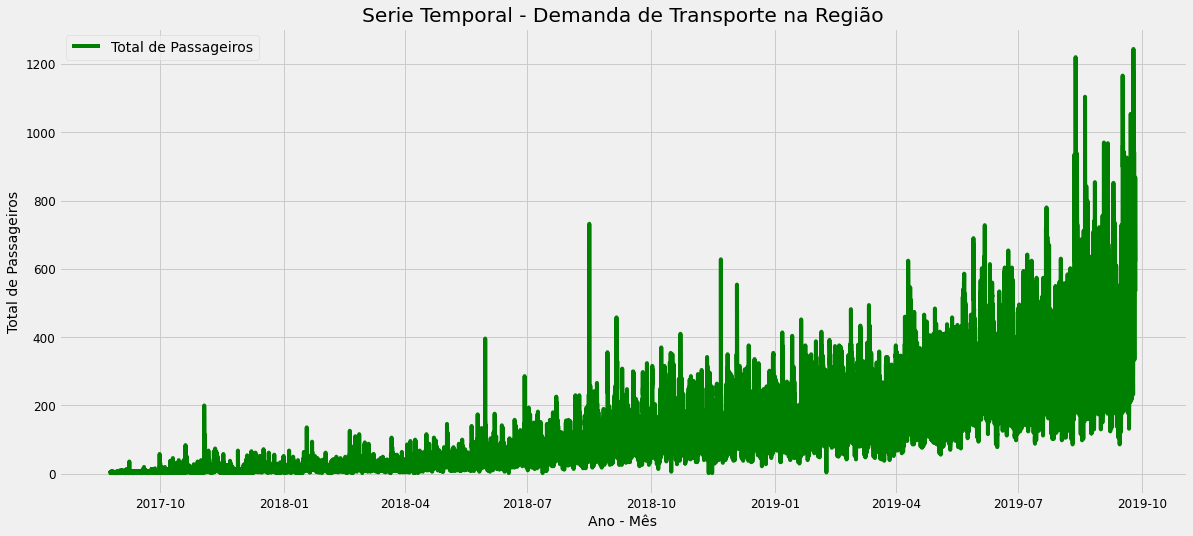

In [36]:
# Plot
plt.title("Serie Temporal - Demanda de Transporte na Região")
plt.plot(target, label = 'Total de Passageiros', color = 'green')
plt.xlabel('Ano - Mês')
plt.ylabel('Total de Passageiros')
plt.legend(loc = 'best')

Percebemos que há claramente uma tendência de aumento no uso de transporte na região ao longo do tempo. Vamos extrair mais detalhes com outros graficos.

<AxesSubplot:xlabel='ano'>

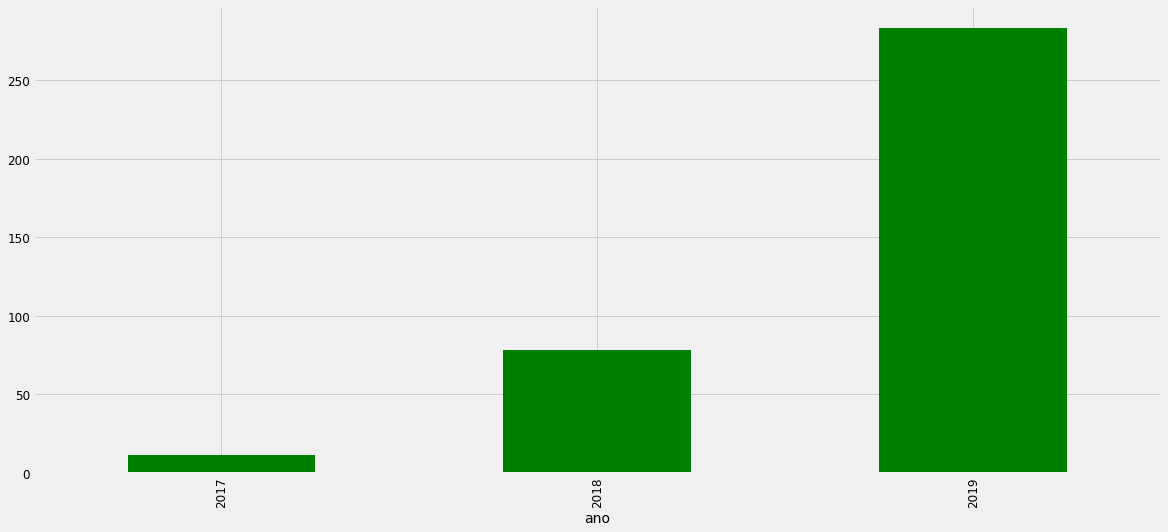

In [41]:
# Let's create a bar chart with the demand for transportation per year.
# The graph's interpretation is very clear.

dados_treino.groupby('ano')['Count'].mean().plot.bar(color = 'green')

<AxesSubplot:xlabel='mes'>

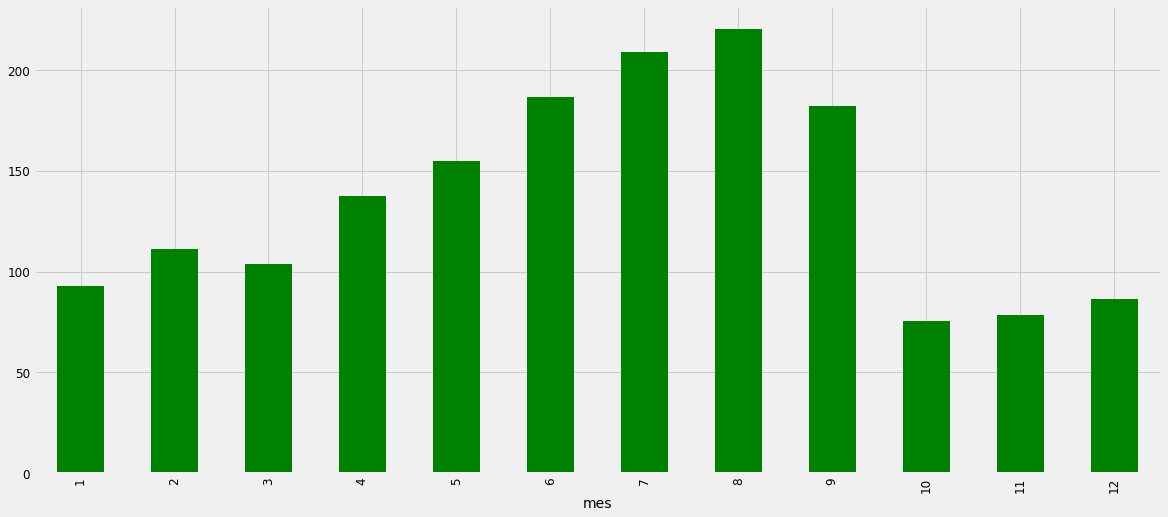

In [43]:
# Let's create a bar chart with the demand for transportation per month.
# Demand reaches its peak in August and falls in the following months.

dados_treino.groupby('mes')['Count'].mean().plot.bar(color = "green")

<AxesSubplot:title={'center':'Média de Passageiros por mês a cada ano'}, xlabel='ano,mes'>

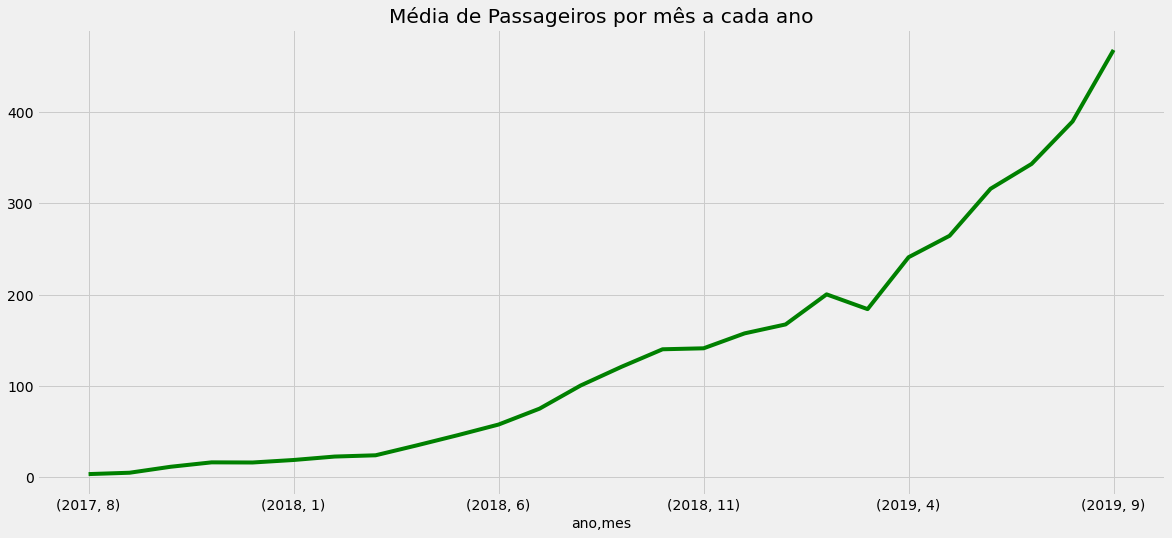

In [44]:
# Let's calculate the monthly average por year
# On average, there is a monthly growth in demand each year
media_mensal = dados_treino.groupby(['ano','mes'])['Count']. mean()
media_mensal.plot(title = "Média de Passageiros por mês a cada ano", fontsize = 14, color = 'green')

<AxesSubplot:xlabel='dia'>

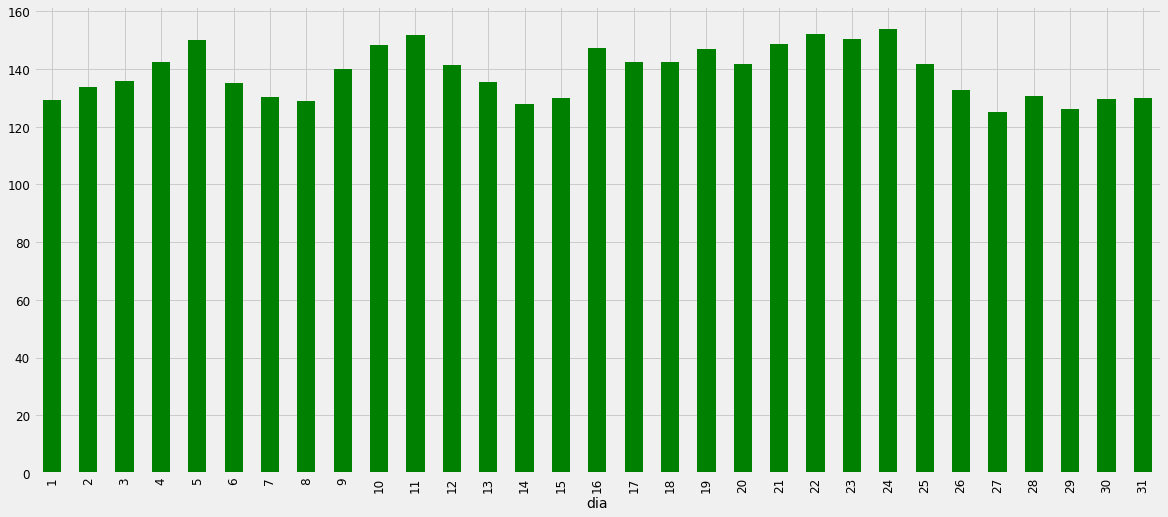

In [45]:
# And what will be the daily average per day of the month? Let's check.
# The day of the month does not appear to be relevant to demand.

dados_treino.groupby('dia')['Count'].mean().plot.bar(color = 'green')

<AxesSubplot:xlabel='hora'>

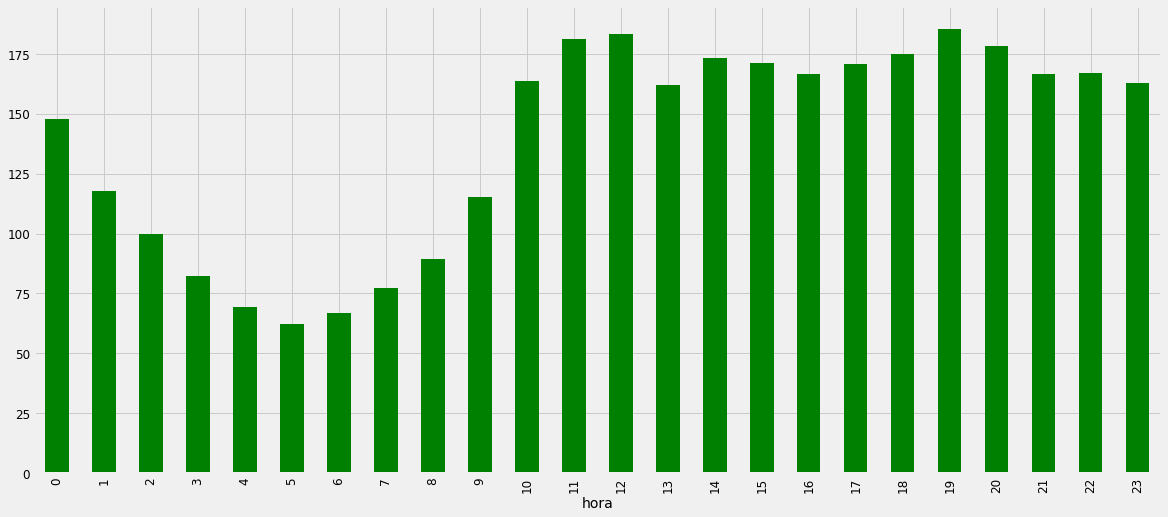

In [47]:
# Let's go down another level and analyze the average hourly demand.
# As expected, at dawn the average is lower than at other times of the day.

dados_treino.groupby('hora')['Count'].mean().plot.bar(color = 'green')

<AxesSubplot:xlabel='final_semana'>

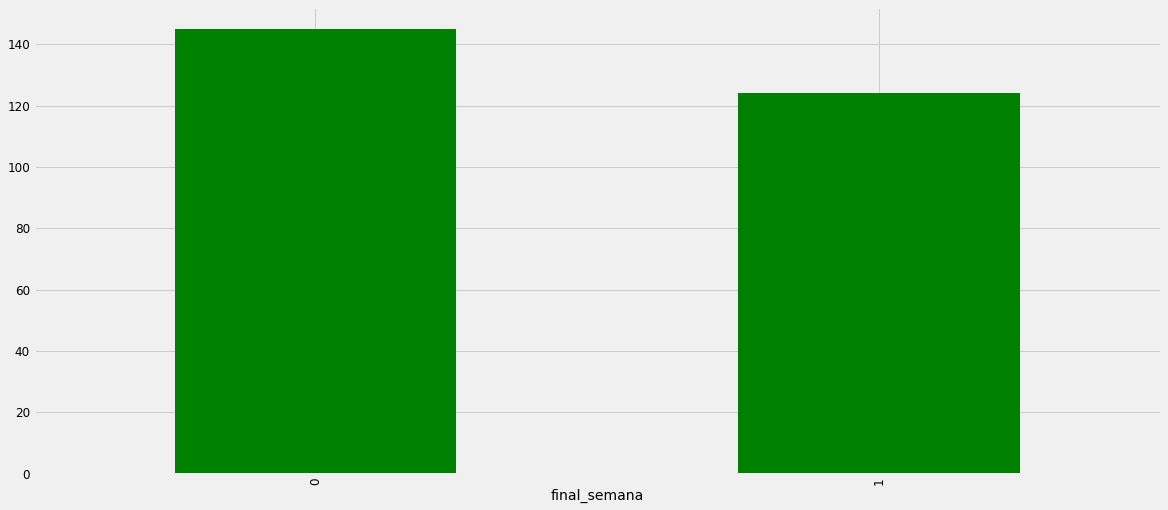

In [50]:
# Finally, let's look the average per weekend or business day. 
# As expected, demand is lower on the weekend, but not unlike business days.

dados_treino.groupby('final_semana')['Count'].mean().plot.bar(color ='green')

Vamos criar um gráfico com 4 séries representando a demanda média por mês, por semana, por dia e por hora para confirmar a tendência de crescimento.

In [54]:
# We collected the Timestamp from the Datetime column
dados_treino.Timestamp = pd.to_datetime(dados_treino.Datetime, format = '%d-%m-%y %H:%M')

# We put Timestamp as the series index
dados_treino.index = dados_treino.Timestamp

,ID,Datetime,Count,ano,mes,dia,hora,dias_semana,final_semana
Datetime,,,,,,,,,
2017-08-25 00:00:00,0,2017-08-25 00:00:00,8,2017,8,25,0,4,0
2017-08-25 01:00:00,1,2017-08-25 01:00:00,2,2017,8,25,1,4,0
2017-08-25 02:00:00,2,2017-08-25 02:00:00,6,2017,8,25,2,4,0
2017-08-25 03:00:00,3,2017-08-25 03:00:00,2,2017,8,25,3,4,0
2017-08-25 04:00:00,4,2017-08-25 04:00:00,2,2017,8,25,4,4,0


In [57]:
# time series of average transport demand per month
seria_media_mes = dados_treino.resample('M').mean()

# Time series of avarege transport demand per week
seria_media_semana = dados_treino.resample('W').mean()

# Time serie of avarage transport demand per day
serie_media_dia = dados_treino.resample('D').mean()

# Time serie of avarage transport demand per hour
serie_media_hora = dados_treino.resample('H').mean()

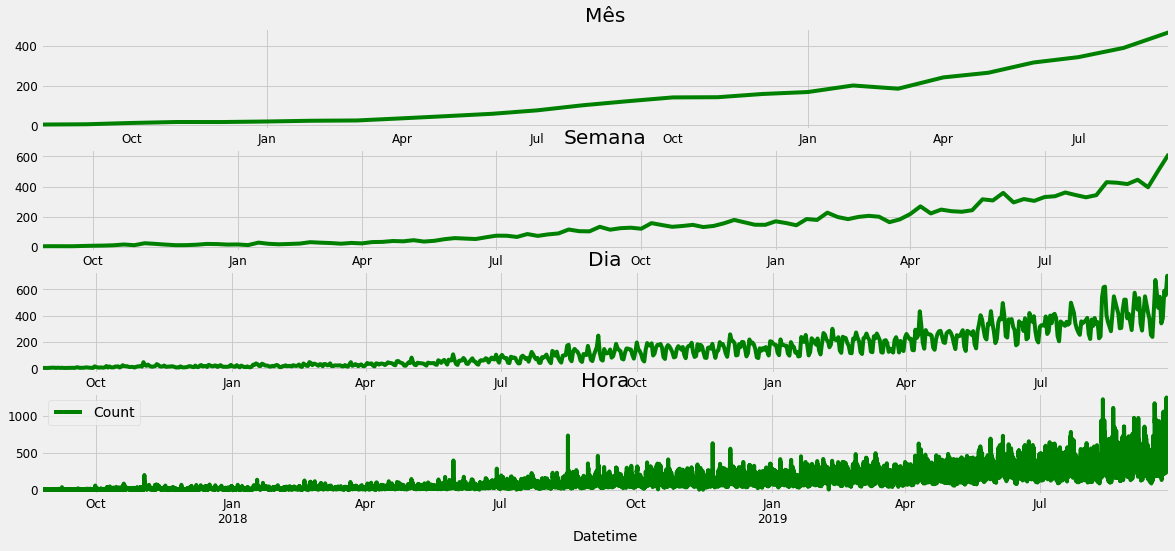

In [60]:
# Plot
fig, axs = plt.subplots(4,1)
seria_media_mes.Count.plot(title = 'Mês', fontsize = 12, ax = axs[0], color = 'green')
seria_media_semana.Count.plot(title = 'Semana', fontsize = 12, ax = axs[1], color = 'green')
serie_media_dia.Count.plot(title = 'Dia', fontsize = 12, ax = axs[2], color = 'green')
serie_media_hora.Count.plot(title = 'Hora', fontsize = 12, ax = axs[3], color = 'green')
plt.legend(loc='best')
plt.show()

## Pré-Processamento

Já coletamos bastante informação sobre nossos dados. Essa compreensão ajuda a entender se nosso modelo preditivo é eficiente. Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

In [61]:
# Training data will be divided into training and validation data.
# note that the records are separated in chronological order.

df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

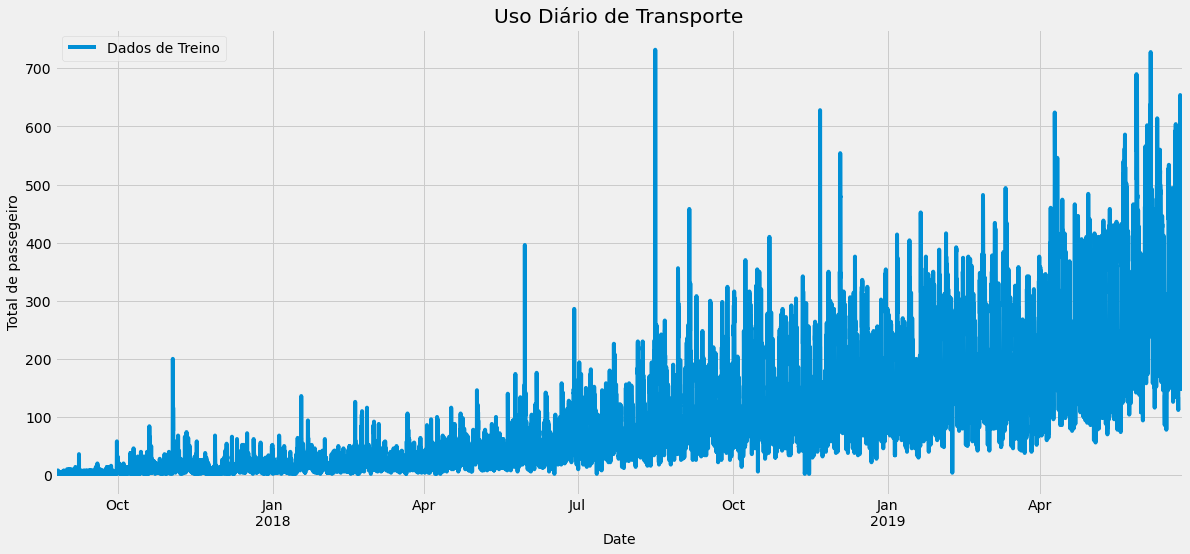

In [65]:
# Plot
df_treino.Count.plot(title = 'Uso Diário de Transporte', fontsize = 14, label = 'Dados de Treino')
plt.xlabel("Date")
plt.ylabel('Total de passegeiro')
plt.legend(loc = "best")
plt.show()

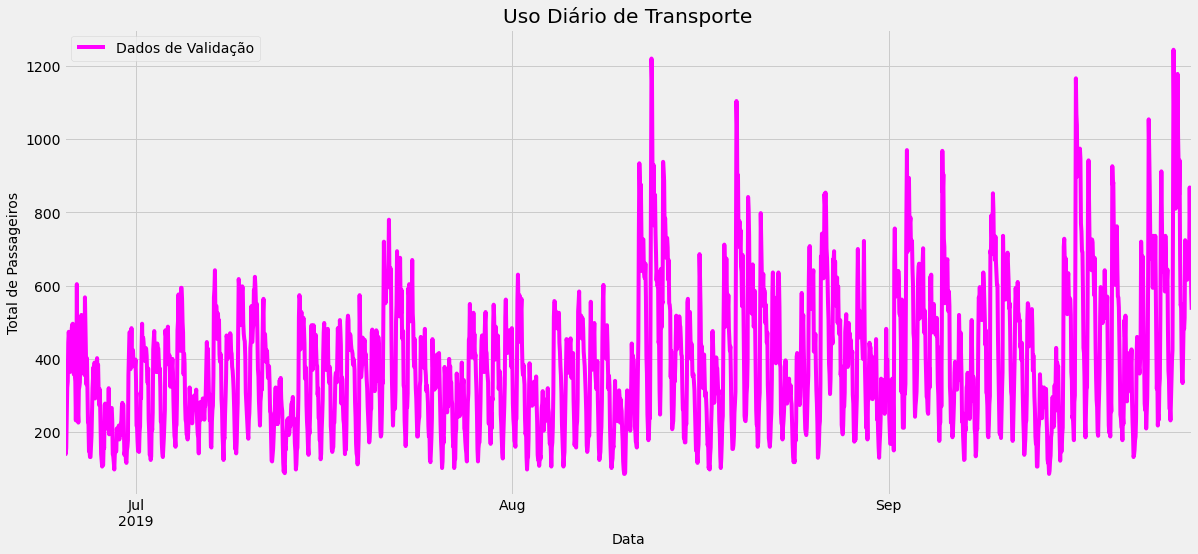

In [67]:
# P`lot
df_valid.Count.plot(title = 'Uso Diário de Transporte', fontsize = 14, label = "Dados de Validação", color ='magenta')
plt.xlabel('Data')
plt.ylabel('Total de Passageiros')
plt.legend(loc = 'best')
plt.show()

## Forecasting - Modelagem Preditiva Para Séries Temporais

Criaremos vários modelos para este problema que temos em mãos, aumentando o grau de complexidade a cada versão.

Mas toda caminhada deve começar com o primeiro passo. Vamos começar com o modelo preditivo mais simples que podemos criar.

<b>Método Naive</b>

Técnica de estimativa na qual os dados reais do último período são usados como previsão desse período, sem ajustá-los ou tentar estabelecer fatores causais. É usado apenas para comparação com as previsões geradas pelas melhores técnicas (sofisticadas).

Naive = ingênuo

Não há técnica avançada aqui e apenas usamos como ponto de partida. Qualquer modelo mais avançado deve apresentar resultados superiores ao Método Naive.

In [68]:
array_count_treino = np.asarray(df_treino.Count)
array_count_treino

array([  8,   2,   6, ..., 352, 390, 332], dtype=int64)

In [69]:
# We created an array with the values of the target variablçe in training
df_valid_cp = df_valid.copy()
df_valid_cp.head()


,ID,Datetime,Count,ano,mes,dia,hora,dias_semana,final_semana
Datetime,,,,,,,,,
2019-06-25 02:00:00,16058,2019-06-25 02:00:00,218,2019,6,25,2,1,0
2019-06-25 03:00:00,16059,2019-06-25 03:00:00,244,2019,6,25,3,1,0
2019-06-25 04:00:00,16060,2019-06-25 04:00:00,168,2019,6,25,4,1,0
2019-06-25 05:00:00,16061,2019-06-25 05:00:00,140,2019,6,25,5,1,0
2019-06-25 06:00:00,16062,2019-06-25 06:00:00,156,2019,6,25,6,1,0


In [71]:
# Forecast

# See how the method is really Naive
# Actual (training) data is used as a forecast for validation data,
# without adjusting them or trying to establish causal factors.

# Yes, this is the Naive Method!
df_valid_cp['previsao_naive'] = array_count_treino[len(array_count_treino) - 1] 

In [72]:
# We put side by side, actual value and "predicted" value
df_valid_cp[['Count', 'previsao_naive']].head()

,Count,previsao_naive
Datetime,,
2019-06-25 02:00:00,218,332
2019-06-25 03:00:00,244,332
2019-06-25 04:00:00,168,332
2019-06-25 05:00:00,140,332
2019-06-25 06:00:00,156,332


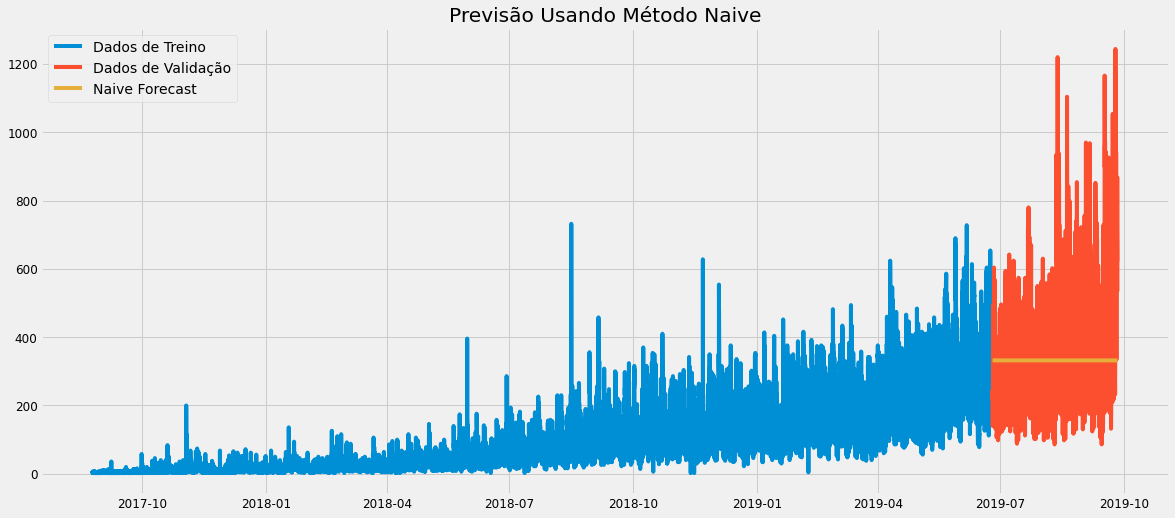

In [73]:
# Plot
plt.title("Previsão Usando Método Naive") 
plt.plot(df_treino.index, df_treino['Count'], label = 'Dados de Treino') 
plt.plot(df_valid.index, df_valid['Count'], label = 'Dados de Validação') 
plt.plot(df_valid_cp.index, df_valid_cp['previsao_naive'], label = 'Naive Forecast') 
plt.legend(loc = 'best') 
plt.show()

Pronto! Temos a previsão da nossa série! Você apresentaria esse modelo ao investidor disposto a investir no seu negócio? Espero que não!

Então vamos trabalhar para criar um modelo robusto nas próximas aulas. Mas antes, vamos calcular a taxa de erro do modelo.

In [74]:
# Defines actual and predicted value
y_true = df_valid_cp.Count
y_pred = df_valid_cp.previsao_naive

In [75]:
# Calculates the error using RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

195.06210118417584
